# Comparative Study of Logistic Regression and Support Vector Machines (SVMs)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)

In [2]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
print(X,y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Initialize models
log_reg = LogisticRegression(max_iter=5000, random_state=42)
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)

In [6]:
# Train models
log_reg.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
# Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_svm_lin = svm_linear.predict(X_test)
y_pred_svm_rbf = svm_rbf.predict(X_test)

In [8]:
# Probabilities for ROC
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_svm_lin = svm_linear.predict_proba(X_test)[:, 1]
y_prob_svm_rbf = svm_rbf.predict_proba(X_test)[:, 1]

In [9]:
# Function to evaluate
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Malignant", "Benign"],
                yticklabels=["Malignant", "Benign"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


===== Logistic Regression =====
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1-Score: 0.9861111111111112
ROC-AUC: 0.9953703703703703


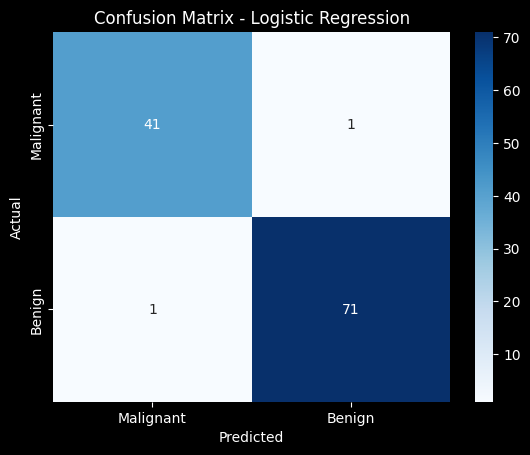


===== SVM (Linear Kernel) =====
Accuracy: 0.9736842105263158
Precision: 0.9859154929577465
Recall: 0.9722222222222222
F1-Score: 0.9790209790209791
ROC-AUC: 0.9963624338624338


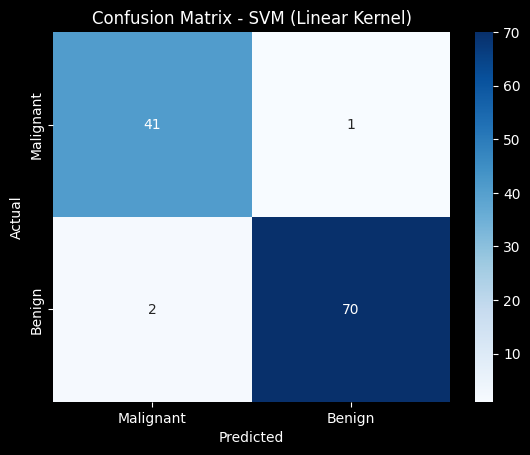


===== SVM (RBF Kernel) =====
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1-Score: 0.9861111111111112
ROC-AUC: 0.9950396825396826


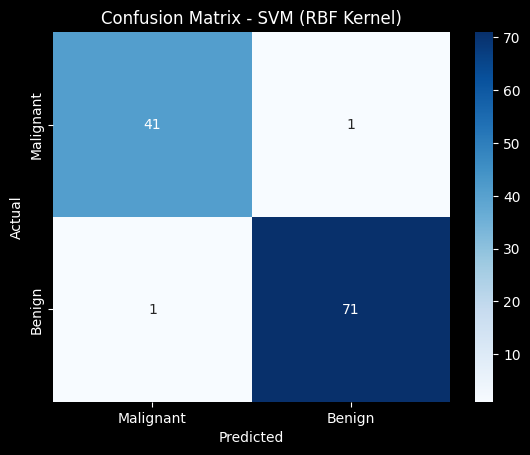

In [10]:
# Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log)
evaluate_model("SVM (Linear Kernel)", y_test, y_pred_svm_lin, y_prob_svm_lin)
evaluate_model("SVM (RBF Kernel)", y_test, y_pred_svm_rbf, y_prob_svm_rbf)

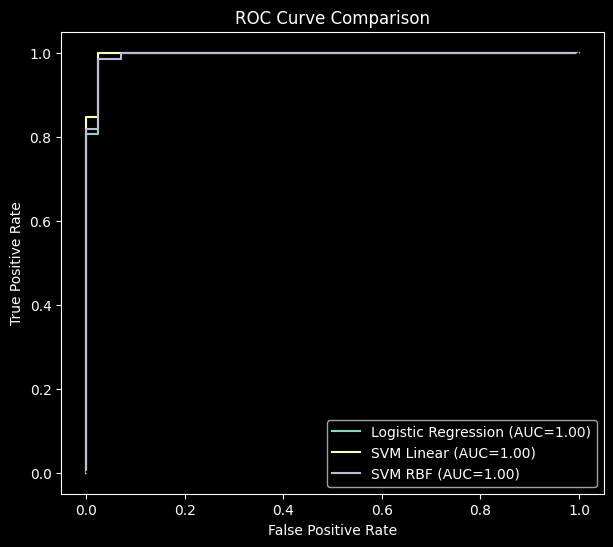

In [11]:
# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_prob_svm_lin)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_svm_rbf)

plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={auc(fpr_log, tpr_log):.2f})")
plt.plot(fpr_lin, tpr_lin, label=f"SVM Linear (AUC={auc(fpr_lin, tpr_lin):.2f})")
plt.plot(fpr_rbf, tpr_rbf, label=f"SVM RBF (AUC={auc(fpr_rbf, tpr_rbf):.2f})")
plt.plot([0, 1], [0, 1], "k--")  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()